Done by Wong Wen Bing, 230436M

# **Part 1: Data Preparation and Understanding** 
This section will comprise of the data understanding and data preparation conducted

In [1]:
# pip install pandas seaborn nltk matplotlib openpyxl

In [2]:
# Import 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [3]:
# nltk.download('all')

Reading in data and understanding data

In [4]:
data=pd.read_excel('Data.xlsx')
data

,description,species
0,2 Jun 2023 ï¿½ The Javan myna shares some simi...,Javan Myna
1,Click here for more information about the Red ...,Collared Kingfisher
2,The black-headed oriole ( Oriolus larvatus) is...,Black-naped Oriole
3,"Search from thousands of royalty-free ""Javan M...",Javan Myna
4,521 foreground recordings and 156 background ...,Little Egret
...,...,...
737,"August 13, 2016 - HISTORICAL records show that...",Little Egret
738,File: Black-naped Oriole (Oriolus chinensis ch...,Black-naped Oriole
739,Larger than a Cattle Egret and with black leg...,Little Egret
740,22 Oct 2023 ï¿½ Dragon Snake (Javan Tubercle S...,Javan Myna


In [5]:
data.shape

(742, 2)

From the above, we can infer that there are 2 columns and a total of 742 rows

**Checking for null and duplicates**  
- there might be some empty values or duplicate values that we need to check for

In [6]:
data.isna().sum()

description    24
species         0
dtype: int64

In [7]:
dup=data.duplicated().value_counts()
print(f'''
duplicates: {dup[True]}
unique: {dup[False]}
''')


duplicates: 128
unique: 614



From the above output we can infer the below: 
*Null Values* 
- there are 24 null values

*Duplicate Values* 
- 

In [8]:
#drop null and duplicate values
data=data.dropna()
data=data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 611 entries, 0 to 739
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  611 non-null    object
 1   species      611 non-null    object
dtypes: object(2)
memory usage: 14.3+ KB


#### **Data Understanding** 
- To understand the distribution of data, I set out to do some visualisations to visualise the distribution of the dataset.

Firstly, we did a distribution of the species (the target variable in the dataset.)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


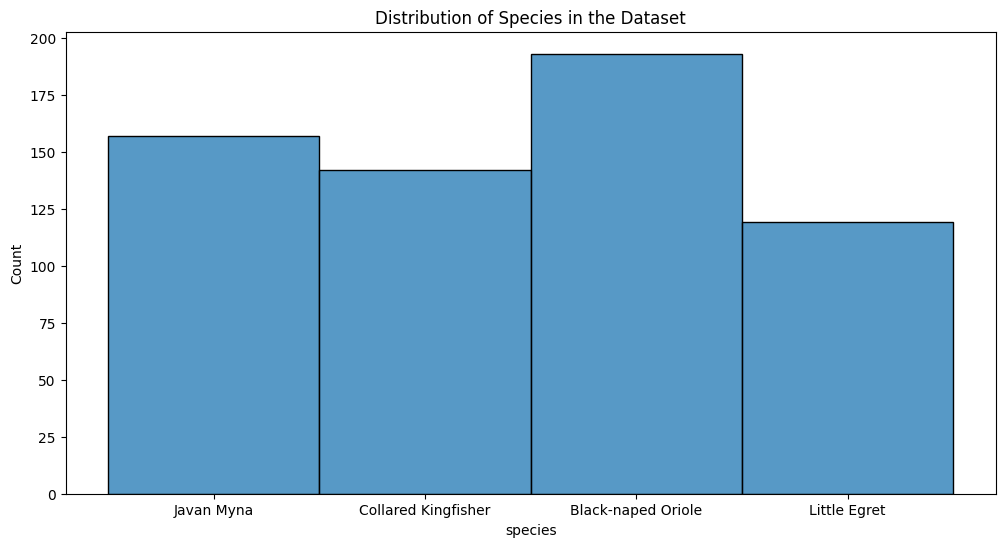

In [34]:
group=data.groupby(['species']).count()
plt.figure(figsize=(12, 6))  
sns.histplot(data['species'])
plt.title('Distribution of Species in the Dataset')
plt.show()

As we can see from above, we can realise that the Black-napled Oriole has the most records in the dataset. 
This means that there is a probability of biasedness in the dataset. 

Now, we are going to investigate the aaverage length of data in the dataset

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


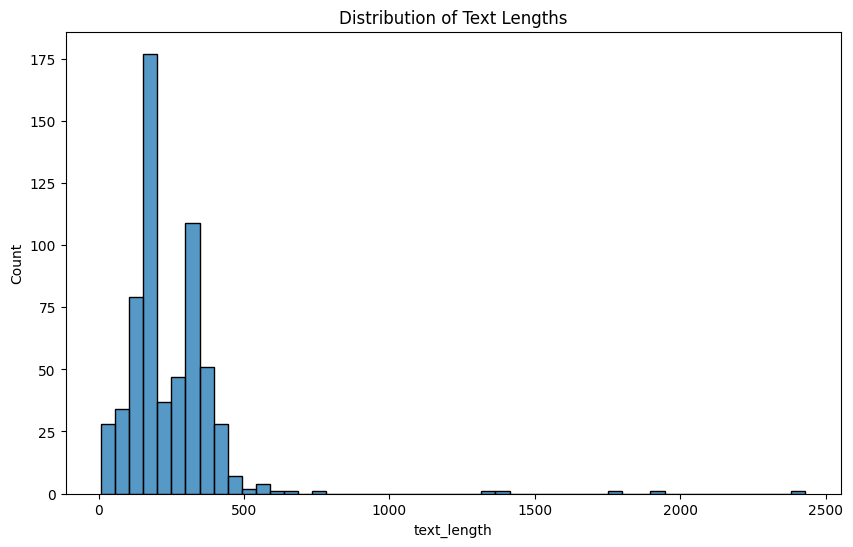

In [10]:
data['text_length'] = data['description'].apply(len)
plt.figure(figsize=(10,6))
sns.histplot(data['text_length'], bins=50)
plt.title('Distribution of Text Lengths')
plt.show()

## **Data Pre-Processing** 
- After examining the data, we now will conduct pre-processing of the data. The pre-processing steps include: 
1. removing of stopwords
2. removing special characters in word

In [45]:
def preprocess_text(text):
    stopwordss=list(stopwords.words('english'))
    text = text.lower()  # Convert to lowercase
    # text = re.sub(r'\w*\d\w*', '', text)  # Remove words with numbers
    # text = re.sub(r'\W+', ' ', text)  # Remove special characters
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'\s\s+',' ', text)
    # print(tokens)
    # for word in tokens: 
    #     if word not in stopwordss: 
    #         wordss.append(word)
    # tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    # print(tokens)
    # wordss.append(tokens)
    # print(wordss)
    return text
data['cleaned_text']=''
data.head()

,description,species,text_length,cleaned_text
0,2 Jun 2023 ï¿½ The Javan myna shares some simi...,Javan Myna,162,
1,Click here for more information about the Red ...,Collared Kingfisher,398,
2,The black-headed oriole ( Oriolus larvatus) is...,Black-naped Oriole,349,
3,"Search from thousands of royalty-free ""Javan M...",Javan Myna,177,
4,521 foreground recordings and 156 background ...,Little Egret,112,


In [46]:
# Apply preprocessing
data['cleaned_text'] = data['description'].apply(lambda x: preprocess_text(x))
data.head()

,description,species,text_length,cleaned_text
0,2 Jun 2023 ï¿½ The Javan myna shares some simi...,Javan Myna,162,jun the javan myna shares some similarities w...
1,Click here for more information about the Red ...,Collared Kingfisher,398,click here for more information about the red ...
2,The black-headed oriole ( Oriolus larvatus) is...,Black-naped Oriole,349,the black headed oriole oriolus larvatus is a ...
3,"Search from thousands of royalty-free ""Javan M...",Javan Myna,177,search from thousands of royalty free javan my...
4,521 foreground recordings and 156 background ...,Little Egret,112,foreground recordings and background recordin...


Investigating word count

In [39]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/299.9 kB 279.3 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/299.9 kB 476.3 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/299.9 kB 607.9 kB/s eta 0:00:01
   ------------------------------- ------ 245.8/299.9 kB 942.1 kB/s eta 0:00:01
   ------------------------------- ------ 245.8/299.9 kB 942.1 kB/s eta 0:00:01
   -------------------------------------- 299.9/299.9 kB 804.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
txt=data['cleaned_text'].tolist() #convert dataframe columns to list
def clean(doc): 
    stopwordss=stopwords.words('english')
    corpus=[]
    for word in doc: 
        words = word_tokenize(word)
        for word in words:
            if word not in stopwordss: 
                corpus.append(word)   
    return corpus
txt=clean(txt)

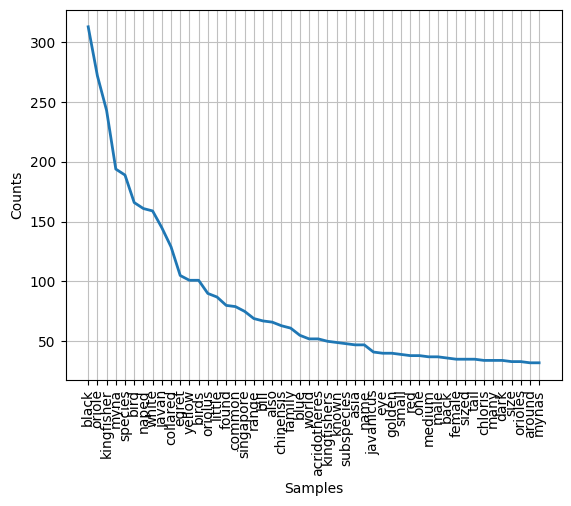

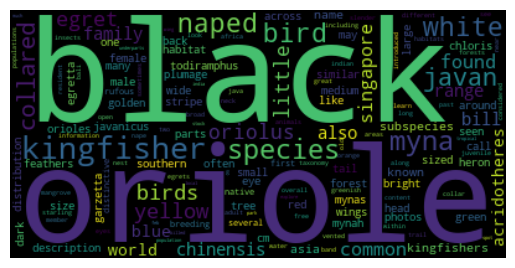

In [52]:
freq_dist=FreqDist(txt) #calculate frequency of words that should be a list
freq_dist.plot(50, cumulative=False) #generate freq distribution plot 
cloud=WordCloud().generate_from_frequencies(freq_dist) #generate word cloud
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
data.to_csv('230436M_cleaned_data.csv')

Feature Engineering

In [14]:
X = data['cleaned_text']
Y= data['species']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)
X_train

508    julrufouscollared kingfisher the rufouscollare...
152    understanding the genetic basis of convergence...
688     the hong kong bird watching society hkbws had...
220    aprcollared kingfisher todirhamphus chloris mo...
184     contents introductionlittle owlfrankfurt germ...
                             ...                        
79     a large coastal kingfisher with a gleaming whi...
352    the giant kingfisher trail follows a jungly ri...
241    the collared kingfisher feeds mainly on insect...
61     altamira oriole audubons oriole robert mcquade...
682    the khor kalba conservation reserve managed by...
Name: cleaned_text, Length: 427, dtype: object

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(stop_words='english', ngram_range=(1,1))
X_train_cv=cv.fit_transform(X_train)
X_test_cv=cv.transform(X_test) #make sure X_test is TRANSFORM and not fit_transform

#print dimensions and features 
print(f"""
training: {X_train_cv.toarray().shape}
test: {X_test_cv.toarray().shape}

features: {cv.get_feature_names_out()}
      """)


training: (427, 3192)
test: (184, 3192)

features: ['abilities' 'ability' 'able' ... 'zebra' 'zimbabwe' 'zoonoses']
      


In [17]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='lbfgs')

#train
lr.fit(X_train_cv, y_train)

#apply to test
y_pred_cv=lr.predict(X_test_cv)
y_pred_cv

array(['Javan Myna', 'Javan Myna', 'Collared Kingfisher',
       'Collared Kingfisher', 'Collared Kingfisher', 'Black-naped Oriole',
       'Javan Myna', 'Collared Kingfisher', 'Javan Myna', 'Javan Myna',
       'Black-naped Oriole', 'Black-naped Oriole', 'Black-naped Oriole',
       'Little Egret', 'Black-naped Oriole', 'Little Egret',
       'Collared Kingfisher', 'Black-naped Oriole', 'Black-naped Oriole',
       'Collared Kingfisher', 'Little Egret', 'Black-naped Oriole',
       'Black-naped Oriole', 'Black-naped Oriole', 'Javan Myna',
       'Black-naped Oriole', 'Black-naped Oriole', 'Collared Kingfisher',
       'Black-naped Oriole', 'Little Egret', 'Collared Kingfisher',
       'Black-naped Oriole', 'Collared Kingfisher', 'Collared Kingfisher',
       'Javan Myna', 'Javan Myna', 'Javan Myna', 'Collared Kingfisher',
       'Black-naped Oriole', 'Collared Kingfisher', 'Black-naped Oriole',
       'Javan Myna', 'Javan Myna', 'Black-naped Oriole', 'Javan Myna',
       'Black-naped 

In [18]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_cv)
cm

array([[57,  1,  0,  0],
       [ 5, 38,  0,  0],
       [ 3,  0, 44,  0],
       [ 7,  0,  2, 27]], dtype=int64)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_cv, target_names=['Black-naped Oriole','Collared Kingfisher','Javan Myna','Little Egret']))

                     precision    recall  f1-score   support

 Black-naped Oriole       0.79      0.98      0.88        58
Collared Kingfisher       0.97      0.88      0.93        43
         Javan Myna       0.96      0.94      0.95        47
       Little Egret       1.00      0.75      0.86        36

           accuracy                           0.90       184
          macro avg       0.93      0.89      0.90       184
       weighted avg       0.92      0.90      0.90       184



In [20]:
#MAIN DIFFERENCE IN CODE
from sklearn.naive_bayes import MultinomialNB

nb=MultinomialNB()

#train
nb.fit(X_train_cv, y_train)

#move to X_test
y_pred_cv=nb.predict(X_test_cv)
# y_pred_cv

In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_cv)
cm

array([[57,  1,  0,  0],
       [ 5, 38,  0,  0],
       [ 2,  1, 44,  0],
       [ 9,  0,  3, 24]], dtype=int64)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_cv, target_names=['Black-naped Oriole','Collared Kingfisher','Javan Myna','Little Egret']))

                     precision    recall  f1-score   support

 Black-naped Oriole       0.78      0.98      0.87        58
Collared Kingfisher       0.95      0.88      0.92        43
         Javan Myna       0.94      0.94      0.94        47
       Little Egret       1.00      0.67      0.80        36

           accuracy                           0.89       184
          macro avg       0.92      0.87      0.88       184
       weighted avg       0.90      0.89      0.88       184



In [23]:
#MAIN DIFFERENCE IN CODE
from sklearn import svm

supportvector=svm.LinearSVC()
#train
supportvector.fit(X_train_cv, y_train)

#move to X_test
y_pred_cv=supportvector.predict(X_test_cv)
# y_pred_cv

C:\Users\wongw\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [24]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_cv)
cm

array([[55,  1,  1,  1],
       [ 3, 39,  0,  1],
       [ 0,  1, 46,  0],
       [ 6,  0,  3, 27]], dtype=int64)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_cv, target_names=['Black-naped Oriole','Collared Kingfisher','Javan Myna','Little Egret']))

                     precision    recall  f1-score   support

 Black-naped Oriole       0.86      0.95      0.90        58
Collared Kingfisher       0.95      0.91      0.93        43
         Javan Myna       0.92      0.98      0.95        47
       Little Egret       0.93      0.75      0.83        36

           accuracy                           0.91       184
          macro avg       0.92      0.90      0.90       184
       weighted avg       0.91      0.91      0.91       184



In [26]:
testset=pd.read_excel('Data_test.xlsx')
testset.head()

,description,species
0,Looking for fun and interesting facts about a ...,Black-naped Oriole
1,Giant Panda. Grey Wolf. Canis lupus. Proboscis...,Black-naped Oriole
2,javanicus displayed during feeding such as wal...,Javan Myna
3,Black-naped Oriole: Explore more topics. Name;...,Black-naped Oriole
4,NaN,Javan Myna


In [27]:
testset.drop_duplicates(inplace=True)
testset.dropna(inplace=True)
testset['cleaned_text'] = testset['description'].apply(preprocess_text)
testset.head()

,description,species,cleaned_text
0,Looking for fun and interesting facts about a ...,Black-naped Oriole,looking for fun and interesting facts about a ...
1,Giant Panda. Grey Wolf. Canis lupus. Proboscis...,Black-naped Oriole,giant panda grey wolf canis lupus proboscis mo...
2,javanicus displayed during feeding such as wal...,Javan Myna,javanicus displayed during feeding such as wal...
3,Black-naped Oriole: Explore more topics. Name;...,Black-naped Oriole,blacknaped oriole explore more topics name des...
5,"The Javan myna, also known as the white-vented...",Javan Myna,the javan myna also known as the whitevented m...


In [28]:
test=testset['cleaned_text'].to_list()
print(test)
vector=cv.transform(test)
testset['log_reg_pred']=(lr.predict(vector))[0]

['looking for fun and interesting facts about a blacknaped oriole learn about this amazing bird and discover other animals from tiny insects to giant mammals', 'giant panda grey wolf canis lupus proboscis monkey western gorilla gorilla gorilla scarlet macaw ara macao basic facts about blackhooded oriole lifespan distribution and habitat map lifestyle and social behavior mating habits diet and nutrition population size and status ', 'javanicus displayed during feeding such as walking jumping hopping gleaning running short flying voicing looking around and feather fluffing a', 'blacknaped oriole explore more topics name descriptiondescription male overall bright yellow plumage with nape and wing tips black female like male but', 'the javan myna also known as the whitevented myna is a species of myna it is a member of the starling family it is native to bali and java it has been introduced to other asian countries and as far away as puerto rico', 'dont worry its not a typo error it is tru

In [29]:
testset.head()

,description,species,cleaned_text,log_reg_pred
0,Looking for fun and interesting facts about a ...,Black-naped Oriole,looking for fun and interesting facts about a ...,Black-naped Oriole
1,Giant Panda. Grey Wolf. Canis lupus. Proboscis...,Black-naped Oriole,giant panda grey wolf canis lupus proboscis mo...,Black-naped Oriole
2,javanicus displayed during feeding such as wal...,Javan Myna,javanicus displayed during feeding such as wal...,Black-naped Oriole
3,Black-naped Oriole: Explore more topics. Name;...,Black-naped Oriole,blacknaped oriole explore more topics name des...,Black-naped Oriole
5,"The Javan myna, also known as the white-vented...",Javan Myna,the javan myna also known as the whitevented m...,Black-naped Oriole


In [30]:
testset['naive_bayes_pred']=(nb.predict(vector))[0]

In [31]:
testset.to_excel('Tested_set.xlsx')

In [54]:
def accuracy(df): 
    # Calculate True Positives (TP): cases where prediction matches the actual species
    correct_predictions = df['species'] == df['naive_bayes_pred']
    tp = correct_predictions.sum()
    
    # Calculate total records
    total_records = len(df)
    
    # Calculate accuracy
    accuracy = tp / total_records if total_records > 0 else 0
    
    # Calculate False Positives (FP): cases where the prediction is wrong
    false_positives = (~correct_predictions).sum()
    
    return accuracy
    
accuracy(testset)

0.41025641025641024